# Music21 Quick Start

This quick start guide shows you how to install and use the `music21` package. This guide is for Python developers who are familiar with musical notation and terminology.

The `music21` package lets you programmatically create musical notation and analyze music. Learn more about `music21` from [What is Music21](https://www.music21.org/music21docs/about/what.html) in the package documentation. 

Follow this tutorial to learn how to perform the following actions by using `music21`:

- [Install the Music21 Package](#Install-the-Music21-Package)
- [Add Notes to a Staff](#Add-Notes-to-a-Staff)
- [Set the Key and Time Signature](#Set-the-Key-and-Time-Signature)
- [Play Back Your Music](#Play-Back-Your-Music)
- [Analyze Your Music](#Analyze-Your-Music)

Learn more about the modules and methods in this guide from the [API Documentation](#API-Documentation) section.

## Install the Music21 Package

Run the following command to install `music21` and its dependencies on this notebook:

In [144]:
!pip install music21

## Import the Music21 Package Functions

Add the following import statement to access the functions in the `music21` package:

In [145]:
from music21 import *

## Add Notes to a Staff

To add a sequence of notes, create a **Stream**. A Stream is a container that stores sequential music data, including the following types:

- Notes
- Time signatures
- Key signatures
- Clefs

To create a Stream object, call the `Stream()` method from the `stream` module.

To add notes, append **Note** objects to the Stream sequentially. A Note defines the attributes of a musical note. To create a Note, specify the pitch and duration in the constructor `Note()` from the `note` module.

To view the Stream container as musical notation, call the `show()` method on the Stream object.

Run the following code to add a sequence of notes to a Stream and display the musical notation:

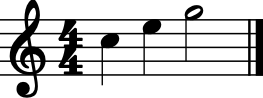

In [146]:
noteStream = stream.Stream()
noteStream.append(note.Note("C5", type='quarter'))
noteStream.append(note.Note("E5", type='quarter'))
noteStream.append(note.Note("G5", type='half'))

noteStream.show()

### Optional: Add a Chord to a Staff

To add a chord, append a **Chord** object to the Stream. A Chord consists of a group of two or more musical notes that belong to the same beat. It shares a base class with Note. To construct a chord, specify the pitches in an array and the duration in the constructor `Chord()` from the `chord` module and add the Chord to your Stream.

Run the following code to add a sample chord and display your Stream.



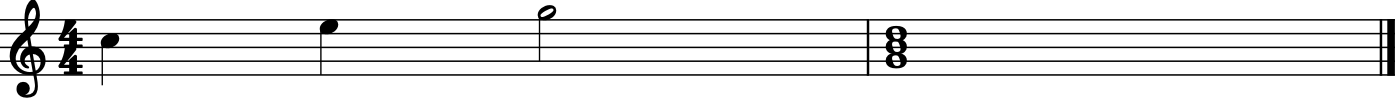

In [147]:
gMajorChord = chord.Chord(['G4','B4','D5'], type='whole')
noteStream.append(gMajorChord)

noteStream.show()

## Set the Key and Time Signature

To set the musical key, append a **Key** object to the Stream. A Key represents the information related to the key signature and can include the associated scale. To construct a Key, specify the name of the key in the `Key()`  method from the `key` package. For example, the value `'e'` represents the key of *E minor*, and the value `'E'` represents the key of *E major*.

**Note:** You can use **KeySignature** instead of a Key, but it omits the relationship between the key and the tonic in a diatonic scale. You must use a Key instead of a KeySignature for harmonic analysis.

To set the time signature, append a **TimeSignature** object to the Stream. A TimeSignature contains a value that represents the music's meter. To construct a TimeSignature, specify the time value in the `TimeSignature()` method from the `meter` package. For example, a value of `'2/4'` sets the length of a measure to *two quarter notes*.

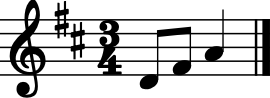

In [152]:
# clear() removes all information from the stream
noteStream.clear()

noteStream.append(meter.TimeSignature('3/4'))  
noteStream.append(key.Key('D'))
noteStream.append(clef.TrebleClef())

noteStream.append(note.Note('D4', type='eighth'))
noteStream.append(note.Note('F#4', type='eighth'))
noteStream.append(note.Note('A4', type='quarter'))

noteStream.show()

## Play Back Your Music

To render a widget that lets you play your Stream using the MIDI protocol, pass the value `'midi'` to the `show()` method. This call generates a MIDI representation of the notes in the Stream.

To learn about additional output options, see the [Stream.show()](https://www.music21.org/music21docs/moduleReference/moduleStreamBase.html#music21.stream.base.Stream.show) API documentation.

Run the following code to create a widget that outputs your Stream in MIDI format:

In [153]:
noteStream.show('midi')

## Analyze Your Music

To get the harmonic function of a chord, pass the Chord and Key to the `romanNumeralFromChord()` method in the `roman` module.

Roman numeral analysis describes the chord characteristics such as the scale degree, inversion, and interval spacing. To learn more about this type of analysis, see [Roman numeral analysis](https://en.wikipedia.org/w/index.php?title=Roman_numeral_analysis&oldid=1202857880) on Wikipedia.

Run the following code to create a sample chord progression, print the Roman numeral analysis, and display the musical notation:

Roman numeral analysis of the chords:

<music21.roman.RomanNumeral I in F major>
<music21.roman.RomanNumeral IV in F major>
<music21.roman.RomanNumeral viio in F major>
<music21.roman.RomanNumeral iii in F major>
<music21.roman.RomanNumeral vi in F major>
<music21.roman.RomanNumeral ii in F major>
<music21.roman.RomanNumeral V in F major>
<music21.roman.RomanNumeral I in F major>


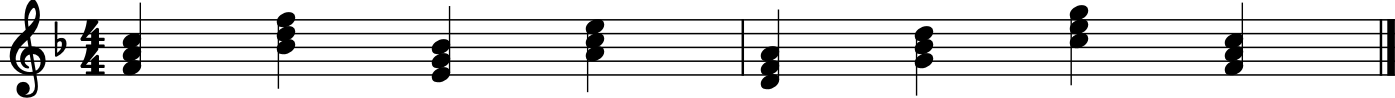

In [154]:
chordProgressionStream = stream.Stream()

fMajorKey = key.Key('F')

# Set the time signature, key, and clef
chordProgressionStream.append(meter.TimeSignature('4/4'))  
chordProgressionStream.append(key.Key('F')) 
chordProgressionStream.append(clef.TrebleClef())

# Create a circle of fourths chord progression 
chords = [
    chord.Chord(['F4','A4','C5'], type='quarter'),
    chord.Chord(['B-4','D5','F5'], type='quarter'),
    chord.Chord(['E4','G4','B-4'], type='quarter'),
    chord.Chord(['A4','C5','E5'], type='quarter'),
    chord.Chord(['D4','F4','A4'], type='quarter'),
    chord.Chord(['G4','B-4','D5'], type='quarter'),
    chord.Chord(['C5','E5','G5'], type='quarter'),
    chord.Chord(['F4','A4','C5'], type='quarter'),
]

# Add the chords
print('Roman numeral analysis of the chords:\n')
for c in chords:
    chordProgressionStream.append(c)
   
# Print the roman numeral analysis of the chords in the Stream
for element in chordProgressionStream:
    if isinstance(element, chord.Chord):
        print(roman.romanNumeralFromChord(element, fMajorKey))

chordProgressionStream.show()

Run the following code to show the MIDI playback widget for the sample chord progression:

In [155]:
chordProgressionStream.show('midi')

## Summary

After completing this quick start guide, you should have an understanding of the following concepts:

- Relationship between the referenced music data classes
- Creation of notes and chords
- Generation of musical notation and playback
- Harmonic analysis of chords

To continue learning about this package, read the [Music21](https://www.music21.org/music21docs/) package documentation and search for other online resources such as this [Music21 YouTube Playlist](https://www.youtube.com/watch?v=zanx4IS3p24&list=PL1dIy2tm36HUn36wXyfXHauDFKO8LviCO).

## API Documentation

To learn more about the modules mentioned in this guide, see the following API documentation:

| Object Type   | Module Name | Method Name and Documentation Link |
----------------|-------------|------------------------------------|
| Stream        | `stream`   | [`Stream()`](https://www.music21.org/music21docs/moduleReference/moduleStreamBase.html#stream) |
| Note          | `note`     | [`Key()`](https://www.music21.org/music21docs/moduleReference/moduleKey.html#music21.key.Key) |
| Pitch         | `pitch`    | [`Pitch()`](https://www.music21.org/music21docs/moduleReference/modulePitch.html#pitch) |
| Duration      | `duration` | [`Duration()`](https://www.music21.org/music21docs/moduleReference/moduleDuration.html#duration) |
| Chord         | `chord`    | [`Chord()`](https://www.music21.org/music21docs/moduleReference/moduleChord.html#chord)  |
| Clef          | `clef`     | [`TrebleClef()`](https://www.music21.org/music21docs/moduleReference/moduleClef.html#music21.clef.TrebleClef) |
| Key           | `key`      | [`Key()`](https://www.music21.org/music21docs/moduleReference/moduleKey.html#music21.key.Key) |
| TimeSignature | `meter`    | [`TimeSignature()`](https://www.music21.org/music21docs/moduleReference/moduleMeterBase.html#timesignature) |
| RomanNumeral  | `roman`    | [`romanNumeralFromChord()`](https://www.music21.org/music21docs/moduleReference/moduleRoman.html#module-music21.roman) |

